In [1]:
#!nvidia-smi

## Import Depencies and read in the meta data

In [2]:
# Import Dependencies
import pandas as pd
import gradio as gr
import operator as op
from sklearn.model_selection import train_test_split
#from sklearn.metrics import balanced_accuracy_score
#from transformers import pipeline
import gradio as gr
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import random

import numpy as np


In [3]:
df_weapons = pd.read_csv('Resources/metadata.csv')
df_weapons

,imagefile,labelfile,target,train_id
0,Automatic Rifle_10.jpeg,Automatic Rifle_10.txt,0,1
1,Automatic Rifle_100.jpeg,Automatic Rifle_100.txt,0,1
2,Automatic Rifle_11.jpeg,Automatic Rifle_11.txt,0,1
3,Automatic Rifle_12.jpeg,Automatic Rifle_12.txt,0,1
4,Automatic Rifle_13.jpeg,Automatic Rifle_13.txt,0,0
...,...,...,...,...
709,Sword_95.jpeg,Sword_95.txt,8,1
710,Sword_96.jpeg,Sword_96.txt,8,0
711,Sword_97.jpeg,Sword_97.txt,8,1
712,Sword_98.jpeg,Sword_98.txt,8,1


In [4]:
# Split .txt and number
df_weapons[['Class', 'weapon_id']] = df_weapons['labelfile']\
                                            .str.replace('.txt', '', regex=False)\
                                            .str.split('_', expand=True)
# Drop initial column 
len(df_weapons),df_weapons.head()


(714,
                   imagefile                labelfile  target  train_id  \
 0   Automatic Rifle_10.jpeg   Automatic Rifle_10.txt       0         1   
 1  Automatic Rifle_100.jpeg  Automatic Rifle_100.txt       0         1   
 2   Automatic Rifle_11.jpeg   Automatic Rifle_11.txt       0         1   
 3   Automatic Rifle_12.jpeg   Automatic Rifle_12.txt       0         1   
 4   Automatic Rifle_13.jpeg   Automatic Rifle_13.txt       0         0   
 
              Class weapon_id  
 0  Automatic Rifle        10  
 1  Automatic Rifle       100  
 2  Automatic Rifle        11  
 3  Automatic Rifle        12  
 4  Automatic Rifle        13  )

In [5]:
# Build a list of imported images
base_path = "Resources/weapon_detection/train/images/"
images_weapons = []

for df_split in range(len(df_weapons)):
    filename = df_weapons.iloc[df_split,0]
    path = base_path + filename
    print(f'{df_split} of {len(df_weapons)}: Attempting to import {filename}')
    try:
        images_weapons.append(Image.open(path).convert('RGB'))
    except:
        print(f'FAILED: {filename}')

        
len(df_weapons),len(images_weapons),images_weapons

0 of 714: Attempting to import Automatic Rifle_10.jpeg
1 of 714: Attempting to import Automatic Rifle_100.jpeg
2 of 714: Attempting to import Automatic Rifle_11.jpeg
3 of 714: Attempting to import Automatic Rifle_12.jpeg
4 of 714: Attempting to import Automatic Rifle_13.jpeg
FAILED: Automatic Rifle_13.jpeg
5 of 714: Attempting to import Automatic Rifle_14.jpeg
6 of 714: Attempting to import Automatic Rifle_15.png
7 of 714: Attempting to import Automatic Rifle_16.png
8 of 714: Attempting to import Automatic Rifle_17.jpeg
9 of 714: Attempting to import Automatic Rifle_18.png
10 of 714: Attempting to import Automatic Rifle_19.jpeg
FAILED: Automatic Rifle_19.jpeg
11 of 714: Attempting to import Automatic Rifle_20.jpeg
12 of 714: Attempting to import Automatic Rifle_21.jpeg
13 of 714: Attempting to import Automatic Rifle_22.jpeg
14 of 714: Attempting to import Automatic Rifle_23.jpeg
15 of 714: Attempting to import Automatic Rifle_24.jpeg
16 of 714: Attempting to import Automatic Rifle_25.j

c:\Users\nick\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


105 of 714: Attempting to import Bazooka_51.jpeg
106 of 714: Attempting to import Bazooka_53.jpeg
107 of 714: Attempting to import Bazooka_55.jpeg
108 of 714: Attempting to import Bazooka_57.jpeg
109 of 714: Attempting to import Bazooka_58.jpeg
110 of 714: Attempting to import Bazooka_59.jpeg
FAILED: Bazooka_59.jpeg
111 of 714: Attempting to import Bazooka_6.jpeg
112 of 714: Attempting to import Bazooka_60.jpeg
113 of 714: Attempting to import Bazooka_61.jpeg
114 of 714: Attempting to import Bazooka_66.jpeg
115 of 714: Attempting to import Bazooka_67.jpeg
116 of 714: Attempting to import Bazooka_68.jpeg
117 of 714: Attempting to import Bazooka_69.jpeg
118 of 714: Attempting to import Bazooka_7.jpeg
119 of 714: Attempting to import Bazooka_70.jpeg
FAILED: Bazooka_70.jpeg
120 of 714: Attempting to import Bazooka_71.jpeg
FAILED: Bazooka_71.jpeg
121 of 714: Attempting to import Bazooka_72.jpeg
FAILED: Bazooka_72.jpeg
122 of 714: Attempting to import Bazooka_73.jpeg
123 of 714: Attempting t

(714,
 571,
 [<PIL.Image.Image image mode=RGB size=1280x720>,
  <PIL.Image.Image image mode=RGB size=1000x750>,
  <PIL.Image.Image image mode=RGB size=1920x1080>,
  <PIL.Image.Image image mode=RGB size=750x450>,
  <PIL.Image.Image image mode=RGB size=1280x720>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=2500x980>,
  <PIL.Image.Image image mode=RGB size=1751x1110>,
  <PIL.Image.Image image mode=RGB size=900x356>,
  <PIL.Image.Image image mode=RGB size=1280x946>,
  <PIL.Image.Image image mode=RGB size=550x240>,
  <PIL.Image.Image image mode=RGB size=768x439>,
  <PIL.Image.Image image mode=RGB size=547x280>,
  <PIL.Image.Image image mode=RGB size=800x600>,
  <PIL.Image.Image image mode=RGB size=480x360>,
  <PIL.Image.Image image mode=RGB size=774x1080>,
  <PIL.Image.Image image mode=RGB size=907x382>,
  <PIL.Image.Image image mode=RGB size=1200x671>,
  <PIL.Image.Image image mode=RGB size=493x450>,
  <PIL.Image.Image image mode=RGB size=480x360

In [6]:
# Remove files without images
df_weapons = df_weapons.loc[df_weapons['train_id'] != 0]
df_weapons = df_weapons.reset_index()
df_weapons = df_weapons.drop('index',axis=1)
df_weapons,len(images_weapons)

(                    imagefile                labelfile  target  train_id  \
 0     Automatic Rifle_10.jpeg   Automatic Rifle_10.txt       0         1   
 1    Automatic Rifle_100.jpeg  Automatic Rifle_100.txt       0         1   
 2     Automatic Rifle_11.jpeg   Automatic Rifle_11.txt       0         1   
 3     Automatic Rifle_12.jpeg   Automatic Rifle_12.txt       0         1   
 4     Automatic Rifle_14.jpeg   Automatic Rifle_14.txt       0         1   
 ..                        ...                      ...     ...       ...   
 566             Sword_93.jpeg             Sword_93.txt       8         1   
 567             Sword_94.jpeg             Sword_94.txt       8         1   
 568             Sword_95.jpeg             Sword_95.txt       8         1   
 569             Sword_97.jpeg             Sword_97.txt       8         1   
 570             Sword_98.jpeg             Sword_98.txt       8         1   
 
                Class weapon_id  
 0    Automatic Rifle        10  
 1    

In [7]:
df_weapons['general'] = 1
df_weapons


,imagefile,labelfile,target,train_id,Class,weapon_id,general
0,Automatic Rifle_10.jpeg,Automatic Rifle_10.txt,0,1,Automatic Rifle,10,1
1,Automatic Rifle_100.jpeg,Automatic Rifle_100.txt,0,1,Automatic Rifle,100,1
2,Automatic Rifle_11.jpeg,Automatic Rifle_11.txt,0,1,Automatic Rifle,11,1
3,Automatic Rifle_12.jpeg,Automatic Rifle_12.txt,0,1,Automatic Rifle,12,1
4,Automatic Rifle_14.jpeg,Automatic Rifle_14.txt,0,1,Automatic Rifle,14,1
...,...,...,...,...,...,...,...
566,Sword_93.jpeg,Sword_93.txt,8,1,Sword,93,1
567,Sword_94.jpeg,Sword_94.txt,8,1,Sword,94,1
568,Sword_95.jpeg,Sword_95.txt,8,1,Sword,95,1
569,Sword_97.jpeg,Sword_97.txt,8,1,Sword,97,1


In [8]:
# Reading the meta file containing all image file names
df_general = pd.read_csv("Resources/dataset/train.csv")
df_general

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous
...,...,...
6464,image2096.jpg,Christmas_Tree
6465,image1474.jpg,Miscellaneous
6466,image4124.jpg,Airplane
6467,image7695.jpg,Candle


In [9]:
# Build a list of imported images
base_path = "Resources/dataset/train/"
images_general = []

for df_split in range(len(df_general)):
    filename = df_general.iloc[df_split,0]
    path = base_path + filename
    print(f'{df_split} of {len(df_general)}: Attempting to import {filename}')
    try:
        images_general.append(Image.open(path).convert('RGB'))
        
    except:
        print(f'FAILED: {filename}')

        
len(images_general),images_general

0 of 6469: Attempting to import image3476.jpg
1 of 6469: Attempting to import image5198.jpg
2 of 6469: Attempting to import image4183.jpg
3 of 6469: Attempting to import image1806.jpg
4 of 6469: Attempting to import image7831.jpg
5 of 6469: Attempting to import image537.jpg
6 of 6469: Attempting to import image9774.jpg
7 of 6469: Attempting to import image5365.jpg
8 of 6469: Attempting to import image9367.jpg
9 of 6469: Attempting to import image4819.jpg
10 of 6469: Attempting to import image4191.jpg
11 of 6469: Attempting to import image6764.jpg
12 of 6469: Attempting to import image8345.jpg
13 of 6469: Attempting to import image3198.jpg
14 of 6469: Attempting to import image7076.jpg
15 of 6469: Attempting to import image2257.jpg
16 of 6469: Attempting to import image7771.jpg
17 of 6469: Attempting to import image7391.jpg
18 of 6469: Attempting to import image8473.jpg
19 of 6469: Attempting to import image4470.jpg
20 of 6469: Attempting to import image9387.jpg
21 of 6469: Attempting t

(6469,
 [<PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x63>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x50>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x113>,
  <PIL.Image.Image image mode=RGB size=80x88>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x125>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x119>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x80>

In [10]:
df_general,len(images_general)

(              Image           Class
 0     image3476.jpg   Miscellaneous
 1     image5198.jpg          Candle
 2     image4183.jpg         Snowman
 3     image1806.jpg   Miscellaneous
 4     image7831.jpg   Miscellaneous
 ...             ...             ...
 6464  image2096.jpg  Christmas_Tree
 6465  image1474.jpg   Miscellaneous
 6466  image4124.jpg        Airplane
 6467  image7695.jpg          Candle
 6468  image3428.jpg        Airplane
 
 [6469 rows x 2 columns],
 6469)

In [11]:
df_general['general'] = 0
df_general

,Image,Class,general
0,image3476.jpg,Miscellaneous,0
1,image5198.jpg,Candle,0
2,image4183.jpg,Snowman,0
3,image1806.jpg,Miscellaneous,0
4,image7831.jpg,Miscellaneous,0
...,...,...,...
6464,image2096.jpg,Christmas_Tree,0
6465,image1474.jpg,Miscellaneous,0
6466,image4124.jpg,Airplane,0
6467,image7695.jpg,Candle,0


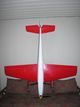

In [12]:
images_general[10]

In [13]:
len(images_general),len(images_weapons)

(6469, 571)

In [14]:
images = images_general + images_weapons
len(images),images

(7040,
 [<PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x63>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x50>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x113>,
  <PIL.Image.Image image mode=RGB size=80x88>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x125>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x119>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x80>

In [15]:
df_weapons['Image'] = df_weapons['imagefile']
df = df_weapons[['Image','general']]
df

,Image,general
0,Automatic Rifle_10.jpeg,1
1,Automatic Rifle_100.jpeg,1
2,Automatic Rifle_11.jpeg,1
3,Automatic Rifle_12.jpeg,1
4,Automatic Rifle_14.jpeg,1
...,...,...
566,Sword_93.jpeg,1
567,Sword_94.jpeg,1
568,Sword_95.jpeg,1
569,Sword_97.jpeg,1


In [16]:
df_general = df_general[['Image','general']]
df_general

,Image,general
0,image3476.jpg,0
1,image5198.jpg,0
2,image4183.jpg,0
3,image1806.jpg,0
4,image7831.jpg,0
...,...,...
6464,image2096.jpg,0
6465,image1474.jpg,0
6466,image4124.jpg,0
6467,image7695.jpg,0


In [17]:
df = pd.concat([df,df_general]).reset_index()
df

,index,Image,general
0,0,Automatic Rifle_10.jpeg,1
1,1,Automatic Rifle_100.jpeg,1
2,2,Automatic Rifle_11.jpeg,1
3,3,Automatic Rifle_12.jpeg,1
4,4,Automatic Rifle_14.jpeg,1
...,...,...,...
7035,6464,image2096.jpg,0
7036,6465,image1474.jpg,0
7037,6466,image4124.jpg,0
7038,6467,image7695.jpg,0


## Pre-process images to prep for splitting into training and testing data

In [18]:
# Check all the sizes into a list, then convert to a set
sizes = set([img.size for img in images])
sizes



{(80, 23),
 (80, 27),
 (80, 30),
 (80, 32),
 (80, 33),
 (80, 34),
 (80, 35),
 (80, 36),
 (80, 37),
 (80, 38),
 (80, 39),
 (80, 40),
 (80, 41),
 (80, 42),
 (80, 43),
 (80, 44),
 (80, 45),
 (80, 46),
 (80, 47),
 (80, 48),
 (80, 49),
 (80, 50),
 (80, 51),
 (80, 52),
 (80, 53),
 (80, 54),
 (80, 55),
 (80, 56),
 (80, 57),
 (80, 58),
 (80, 59),
 (80, 60),
 (80, 61),
 (80, 62),
 (80, 63),
 (80, 64),
 (80, 65),
 (80, 66),
 (80, 67),
 (80, 68),
 (80, 69),
 (80, 70),
 (80, 71),
 (80, 72),
 (80, 73),
 (80, 74),
 (80, 75),
 (80, 76),
 (80, 77),
 (80, 78),
 (80, 79),
 (80, 80),
 (80, 81),
 (80, 82),
 (80, 83),
 (80, 84),
 (80, 85),
 (80, 86),
 (80, 87),
 (80, 88),
 (80, 89),
 (80, 90),
 (80, 91),
 (80, 92),
 (80, 93),
 (80, 94),
 (80, 95),
 (80, 96),
 (80, 97),
 (80, 98),
 (80, 99),
 (80, 100),
 (80, 101),
 (80, 102),
 (80, 103),
 (80, 104),
 (80, 105),
 (80, 106),
 (80, 107),
 (80, 108),
 (80, 109),
 (80, 110),
 (80, 111),
 (80, 112),
 (80, 113),
 (80, 114),
 (80, 115),
 (80, 116),
 (80, 117),
 (8

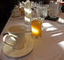

In [19]:
# Use a for loop to resize all images to 64 by 60
target_size = (64, 60)

resized_images = [img.resize(target_size, resample = Image.LANCZOS) for img in images]

resized_images[1]


In [20]:
# Check images resizing
sizes = set([img.size for img in resized_images])
sizes

{(64, 60)}

In [21]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_images]

#print(float_images.shape)
print(float_images[0])


[[[ 64. 107.  89.]
  [ 51. 111.  69.]
  [ 76. 143.  78.]
  ...
  [ 65.  81.  83.]
  [ 87. 106. 112.]
  [ 30.  48.  58.]]

 [[ 75. 103.  91.]
  [ 65. 114.  76.]
  [ 87. 154.  91.]
  ...
  [ 85. 102. 102.]
  [ 36.  55.  59.]
  [ 36.  55.  63.]]

 [[ 74.  79.  79.]
  [ 60.  96.  66.]
  [ 64. 131.  71.]
  ...
  [ 54.  70.  69.]
  [ 10.  28.  30.]
  [ 55.  75.  78.]]

 ...

 [[113. 100.  83.]
  [104.  91.  77.]
  [ 94.  84.  73.]
  ...
  [ 41.  40.  32.]
  [ 58.  54.  49.]
  [ 85.  80.  76.]]

 [[115. 102.  85.]
  [ 92.  79.  66.]
  [ 96.  85.  75.]
  ...
  [144. 143. 135.]
  [139. 135. 130.]
  [140. 135. 131.]]

 [[103.  89.  75.]
  [ 96.  82.  70.]
  [ 81.  69.  62.]
  ...
  [181. 180. 172.]
  [185. 181. 176.]
  [204. 199. 195.]]]


In [22]:
# normalize images to a range between 0 and 1 by
# dividing all pixel values by the max of 255

normalized_images = [img/255 for img in float_images]

# Display the pixel values 
print("Pixel Values:")
print(normalized_images[0].shape)
print(normalized_images[0])


Pixel Values:
(60, 64, 3)
[[[0.2509804  0.41960785 0.34901962]
  [0.2        0.43529412 0.27058825]
  [0.29803923 0.56078434 0.30588236]
  ...
  [0.25490198 0.31764707 0.3254902 ]
  [0.34117648 0.41568628 0.4392157 ]
  [0.11764706 0.1882353  0.22745098]]

 [[0.29411766 0.40392157 0.35686275]
  [0.25490198 0.44705883 0.29803923]
  [0.34117648 0.6039216  0.35686275]
  ...
  [0.33333334 0.4        0.4       ]
  [0.14117648 0.21568628 0.23137255]
  [0.14117648 0.21568628 0.24705882]]

 [[0.2901961  0.30980393 0.30980393]
  [0.23529412 0.3764706  0.25882354]
  [0.2509804  0.5137255  0.2784314 ]
  ...
  [0.21176471 0.27450982 0.27058825]
  [0.03921569 0.10980392 0.11764706]
  [0.21568628 0.29411766 0.30588236]]

 ...

 [[0.44313726 0.39215687 0.3254902 ]
  [0.40784314 0.35686275 0.3019608 ]
  [0.36862746 0.32941177 0.28627452]
  ...
  [0.16078432 0.15686275 0.1254902 ]
  [0.22745098 0.21176471 0.19215687]
  [0.33333334 0.3137255  0.29803923]]

 [[0.4509804  0.4        0.33333334]
  [0.360784

In [23]:
for i in range(len(normalized_images)):
    print(normalized_images[0].shape)

(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60, 64, 3)
(60,

In [24]:
# Set X and y values
X = normalized_images
y = df['general']
# Check value lengths for X and y variables
len(X),len(y),X[0].shape
X[0].shape

(60, 64, 3)

In [25]:
y.nunique()

2

In [26]:
# One hot encode the y data
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y).reshape(-1, 1))
y_train_aug_enc = y_encoder.transform(np.array(y).reshape(-1, 1))


In [27]:
# Convert values to numpy arrays

y = np.array(y_train_aug_enc)
X = np.array(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [29]:
X_train.shape,y_train.shape

((5280, 60, 64, 3), (5280, 2))

## Augment to get more samples

In [30]:
# Apply augmentation to the whole training dataset
# Define the augmentation pipeline
augmentation_model = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomZoom(0.2),            
    tf.keras.layers.RandomFlip('horizontal')     
])


In [ ]:

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through all the images
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]
    
    ## Add a channel dimension for grayscale images
    img = np.expand_dims(img, axis=0)  
    
    ## Ensure that the input data has the correct shape
    #img = np.expand_dims(img, axis=-1) 
    
    # Add 5 images for every original image
    for j in range(5):
        # Append a new image to the X list
        X_train_aug.append(augmentation_model(img, training=True)[0].numpy())
        #print(X_train_aug[0].shape)
        
        # Append the label for the original image to the y list
        y_train_aug.append(label)

# Print the length of each list
print(len(X_train_aug))
print(len(y_train_aug))
X_train_aug[0].shape,y_train_aug[0].shape

In [ ]:
df

In [32]:
# Reshape test data for the model
X_test_np = []
for img in X_test:
    
    # Append the image to the list
    X_test_np.append(img)

# Convert to numpy array
X_test_np = np.array(X_test_np)

# Check the shape of the first image
X_test_np[0].shape,len(X_test_np)

((60, 64, 3), 1760)

In [33]:
y_train_aug[0].shape

(2,)

In [ ]:
# One hot encode the y data
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train_aug).reshape(-1, 1))
y_train_aug_enc = y_encoder.transform(np.array(y_train_aug).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))

# Convert values to numpy arrays
X_train_aug_np = np.array(X_train_aug)
X_test_np = np.array(X_test_np)
y_train_aug_np = np.array(y_train_aug_enc)
y_test_np = np.array(y_test_enc)

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_aug_np, y_train_aug, test_size=0.2, random_state=42)

# Print the total number of one_hot_encoded columns
np.array(y_train).shape,X_train[0].shape

## Create a CNN model

In [34]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(60, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(90, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(36, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(27, activation='relu'),
    #layers.Dense(18, activation='relu'),
    #layers.Dense(27, activation='relu'),
    layers.Dense(18, activation='relu'),
    layers.Dense(2, activation='sigmoid') 
])


In [35]:

# Compile the model
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])


In [36]:

# Train the model
batch_size = 900
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=epochs
)

Epoch 1/10
165/165 [==============================] - 50s 296ms/step - loss: 0.3166 - accuracy: 0.9180 - val_loss: 0.3132 - val_accuracy: 0.9131
Epoch 2/10
165/165 [==============================] - 47s 283ms/step - loss: 0.2950 - accuracy: 0.9208 - val_loss: 0.3061 - val_accuracy: 0.9131
Epoch 3/10
165/165 [==============================] - 46s 278ms/step - loss: 0.2897 - accuracy: 0.9208 - val_loss: 0.2979 - val_accuracy: 0.9131
Epoch 4/10
165/165 [==============================] - 46s 278ms/step - loss: 0.2859 - accuracy: 0.9208 - val_loss: 0.2989 - val_accuracy: 0.9131
Epoch 5/10
165/165 [==============================] - 46s 277ms/step - loss: 0.2845 - accuracy: 0.9208 - val_loss: 0.2951 - val_accuracy: 0.9131
Epoch 6/10
165/165 [==============================] - 46s 277ms/step - loss: 0.2832 - accuracy: 0.9208 - val_loss: 0.2990 - val_accuracy: 0.9131
Epoch 7/10
165/165 [==============================] - 46s 277ms/step - loss: 0.2827 - accuracy: 0.9208 - val_loss: 0.2951 - val_ac

In [37]:
# Evaluate the model using the testing data
results = model.evaluate(X_test, y_test)
results


55/55 [==============================] - 4s 67ms/step - loss: 0.2939 - accuracy: 0.9131


[0.29391032457351685, 0.9130681753158569]

In [ ]:
import pickle

# save classification model as a pickle file
model_large_pkl = "binary_model.pkl"  

with open(model_large_pkl, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# load model to use

# to load in    
# load model from pickle file
#with open(model_pkl, 'rb') as file:  
#model = pickle.load(file)  
